# BAB 2 - DATA UNDERSTANDING



# RINGKASAN
- Data Understanding adalah tahap awal dalam eksplorasi data yang mencakup pemahaman struktur, distribusi, dan kualitas data.

- Terdapat berbagai tipe data berdasarkan sifat, skala pengukuran, bentuk, dan sumbernya.

- Deteksi outlier adalah bagian dari Data Understanding, dan KNN dapat digunakan untuk membantu mendeteksi outlier berbasis jarak atau kepadatan.

- KNN sebagai metode deteksi outlier bisa masuk ke Data Understanding, tetapi jika digunakan untuk prediksi, maka masuk ke tahap Modeling.

- Pemilihan nilai K dalam KNN sangat penting untuk mendapatkan hasil deteksi outlier yang optimal.



# DATA UNDERSTANDING

 1.1 Pengertian Data Understanding
Data Understanding adalah tahao awal dalam proses data mining yang bertujuan untuk memahami karakteristik data sebelm dilakukan analisis lebih lanjut. Pada tahap ini, dilakukan eksplorasi data untuk mengidentfikasi polsa, distribusi, anomali, serta hubungan antar variabel

1.2 Tujuan Data Understanding
- memahami struktur dan distribusi data
- mengetahui kualitas data (misalnya, adanya nilai yang hilang/outlier)
- mengidentifikasi hubungan antar variabel
- menentukan teknik preprocessing yang diperlukan sebelum pemodelan

1.3 Langkah-Langkah Data Understanding
 -  mengumpulkan data awal: mengidentifikasi sumber data dan formatnya (misalnya, database, file CSV, JSON, dll.)
 -  menjelaskan data: mengidentifikasi atribut, tipe data, dan deskripsi data
 -  menjelajahi data: melakukan analisis awal dengan statistik deskriptif dan visulisasi
 -  memverifikasi kualitas data: memeriksa adanya data yang hilang, duplikat/tidak valid
 -  membuat ringkasan data: menyusun laporan awal mengenai karakteristik data
 -  mengidentifikasi masalah dalam data: mencari outlier/nilai yang tidak wajar dalam dataset

# TIPE-TIPE DATA DALAM DATA UNDERSTANDING

2.1 Berdasarkan Sifatnya
- data numerik: data berupa angka yang dapat dihitung/diukur, seperti usia dan pendapatan
- data kategorikal/kualitatif: data yang berupa kategori/label, seperti jenis kelamin/warna mata

2.2 Berdasarkan Skala Pengukuran
- nominal: data dalam bentuk kategori tanpa urutan tertentu (misal: warna, jenis kelamin)
- ordinal: data kategori dengan urutan tetapi jaraknya tidak pasti (misal: tingkat pendidikan, kepuasan pelanggan)
- interval: data numerik dengan jarak tetap anar nilai tetapi tanpa nol absolut (misal: suhu dalam celsius/fahrenheit)
- rasio: data numerik dengan nol absolut yang memungkinakan perbandingan rasio (misal: berat badan, pendapatan)

2.3 Berdasarkan Bentuknya
- data diskrit: data yang hanya memmiliki nilai tertentu (misa: jumlah anak, jumlah mobil)
- data kontinu: data yang bisa memiliki nilai dalam rentang tertenu termasuk pecahan (misal: tinggi badan, waktu perjalanan)

2.4 Berdasarkan Sumbernya
- data primer: daya uang dikumpulkan langsung dari sumbernya (misal: surbei, wawancara, eksperimen)
- data sekunder: data yang diperoleh dari sumber yang sudah ada (misal: laporan, database perusahaan

# DETEKSI OUTLIER MENGGUNAKAN KNN

3.1 Pengertian Outlier

Outlier adalah data yang dimiliki nilai yang jauh berbeda dari mayoritas data lainnya dalam dataset, keberadaan outlier dapat disebabkan oleh kesalahan pengukuran, kesalahan entri data/fenomena unik yang berbeda dari pola umum dalam dataset

3.2 Jenis-Jenis Metrik Jarak dalam KNN

dalam deteksi outlier menggunakan Knn, pemilihan metrik jarak sangat penting karna mempengaruhi bagaimana tetangga terdekat dihitung.

a. Euclidean Distance
- mengukur jarak lurus antara dua titik dalam ruang Euclidean
- cocok untuk data dengan skala yang seragam dan tanpa korelasi antar fitur
- rumus

  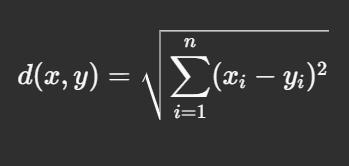

b. Manhattan Distance
- mengukur jarak berdasarkan perbedaan absolut antara koordinat dua titik
- cocok untuk data dengan struktur grid/jika fitur memiliki perbedaan skala yang signifikan
- rumus

  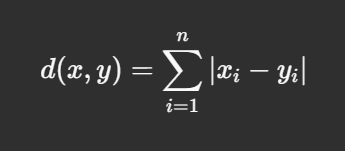

c. Minkowski Disance
- generalisasi dari Euclidean dan Manhattan Distance
- jika p = 2, maka sama dengan Euclidean Distance
- jika p = 1, maka sama dengan Manhattan Distance
- rumus

  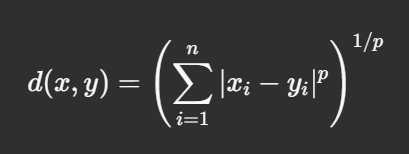

3.3 Metode Deteksi Outlier dengan KNN

K-nearest neighbors (KNN) adalah metode berbasais jarak/kepadatan yang dapat digunakan untuk mendeteksi outlier, terdapat dua pendekatan utama dalam deteksi outlier

a. KNN distance-based outlier detection
- mengukur jarak rata-rata ke K tetangga terdekat
- jika suatu titik memiliki jarak rata-rata yang lebih besar dibandingkan dengan titik lainnya, maka titik tersebut dianggap sebagai outlier
- rumus

  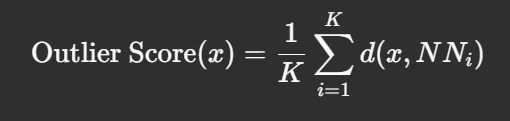

  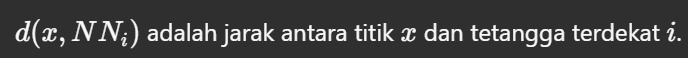

b. KNN density-based outlier detection (local outlier factor - lof)
- berdsasarkan kepadatan relatif suatu titik dibandingkan dengan tetangga nya
- jika kepadatan suatu titik jauh lebih rendah dibandingkan dengan kepadatan tetanggannya, maka titik tersebut dianggp sebgai outlier
- rumus

  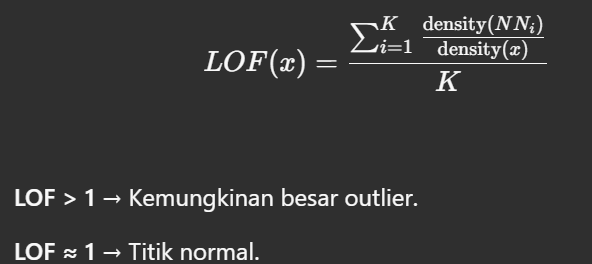




# PRAKTEK

VISUALISASI DATA

1. Install beberapa library yang dibutuhkan

In [ ]:
!pip install pymysql

In [ ]:
!pip install psycopg2-binary

In [ ]:
!pip install pandas

2. Mengambil database MySql, dari Dbeaver, sebuah alat database (database tool) universal yang digunakan untuk mengelola berbagai jenis database, baik SQL (seperti MySQL, PostgreSQL, SQLite) maupun NoSQL (seperti MongoDB, Cassandra).

In [ ]:
import pymysql
import pandas as pd
from tabulate import tabulate

MYSQL_HOST = "mysql-3d9be5d4-irismysqll.g.aivencloud.com"
MYSQL_PORT = 28758  # Aiven MySQL biasanya menggunakan port 25060
MYSQL_DB = "defaultdb"  # Ganti dengan nama database Anda
MYSQL_USER = "avnadmin"  # Username dari Aiven.io
MYSQL_PASS = "AVNS_9SRQX7luHCPCP1wxyhh"  # Ganti dengan password dari Aiven.io

try:
    # Membuat koneksi ke MySQL
    conn = pymysql.connect(
        host=MYSQL_HOST,
        port=MYSQL_PORT,
        user=MYSQL_USER,
        password=MYSQL_PASS,
        database=MYSQL_DB,
        ssl={'ssl': {}},  # Aiven.io membutuhkan koneksi SSL
    )
    cur = conn.cursor()

    # Menjalankan query (Ganti 'your_table' dengan nama tabel yang benar)
    cur.execute("SELECT * FROM defaultdb.irissql;")
    rows = cur.fetchall()

    # Mengambil nama kolom
    col_names = [desc[0] for desc in cur.description]

    # Menampilkan hasil dalam bentuk tabel
    df = pd.DataFrame(rows, columns=col_names)
    print(tabulate(df, headers="keys", tablefmt="psql"))

except Exception as e:
    print("Error:", e)

finally:
    # Menutup koneksi
    if cur:
        cur.close()
    if conn:
        conn.close()

+-----+------+-----------------+----------------+---------------+
|     |   id | Class           |   petal length |   petal width |
|-----+------+-----------------+----------------+---------------|
|   0 |    1 | Iris-setosa     |            1.4 |           0.2 |
|   1 |    2 | Iris-setosa     |            1.4 |           0.2 |
|   2 |    3 | Iris-setosa     |            1.3 |           0.2 |
|   3 |    4 | Iris-setosa     |            1.5 |           0.2 |
|   4 |    5 | Iris-setosa     |            1.4 |           0.2 |
|   5 |    6 | Iris-setosa     |            1.7 |           0.4 |
|   6 |    7 | Iris-setosa     |            1.4 |           0.3 |
|   7 |    8 | Iris-setosa     |            1.5 |           0.2 |
|   8 |    9 | Iris-setosa     |            1.4 |           0.2 |
|   9 |   10 | Iris-setosa     |            1.5 |           0.1 |
|  10 |   11 | Iris-setosa     |            1.5 |           0.2 |
|  11 |   12 | Iris-setosa     |            1.6 |           0.2 |
|  12 |   

3. Mengambil database postgresql dari Dbeaver, sebuah alat database (database tool) universal yang digunakan untuk mengelola berbagai jenis database, baik SQL (seperti MySQL, PostgreSQL, SQLite) maupun NoSQL (seperti MongoDB, Cassandra).

In [ ]:
import psycopg2
import pandas as pd
from tabulate import tabulate

PG_HOST = "pg-ee5fcb6-irisposgresqll.g.aivencloud.com"
PG_PORT = "13492"
PG_NAME = "defaultdb"
PG_USER = "avnadmin"
PG_PASS = "AVNS_82XRmz2cSUlzQs353EZ"

try:
    conn = psycopg2.connect(
        host=PG_HOST,
        port=PG_PORT,
        dbname=PG_NAME,
        user=PG_USER,
        password=PG_PASS,
        sslmode="require"
    )
    cur = conn.cursor()

    # Menjalankan query
    cur.execute("SELECT * FROM irispostgresql.irispostgresql;")  # Ganti dengan nama skema & tabel yang benar
    rows = cur.fetchall()

    # Mengambil nama kolom
    col_names = [desc[0] for desc in cur.description]

    # Menampilkan hasil dalam bentuk tabel
    df = pd.DataFrame(rows, columns=col_names)
    print(tabulate(df, headers="keys", tablefmt="psql"))

except Exception as e:
    print("Error:", e)

finally:
    # Menutup koneksi
    if cur:
        cur.close()
    if conn:
        conn.close()

+-----+------+-----------------+----------------+---------------+
|     |   id | Class           |   sepal length |   sepal width |
|-----+------+-----------------+----------------+---------------|
|   0 |    1 | Iris-setosa     |            5.1 |           3.5 |
|   1 |    2 | Iris-setosa     |            4.9 |           3   |
|   2 |    3 | Iris-setosa     |            4.7 |           3.2 |
|   3 |    4 | Iris-setosa     |            4.6 |           3.1 |
|   4 |    5 | Iris-setosa     |            5   |           3.6 |
|   5 |    6 | Iris-setosa     |            5.4 |           3.9 |
|   6 |    7 | Iris-setosa     |            4.6 |           3.4 |
|   7 |    8 | Iris-setosa     |            5   |           3.4 |
|   8 |    9 | Iris-setosa     |            4.4 |           2.9 |
|   9 |   10 | Iris-setosa     |            4.9 |           3.1 |
|  10 |   11 | Iris-setosa     |            5.4 |           3.7 |
|  11 |   12 | Iris-setosa     |            4.8 |           3.4 |
|  12 |   

3. Gabungkan kedua database Mysql dan Postgresql, untuk jadi satu

In [ ]:
import psycopg2
import pymysql
import pandas as pd
from tabulate import tabulate

# 🛠 Konfigurasi koneksi ke MySQL (Aiven.io)
DB_HOST = "mysql-3d9be5d4-irismysqll.g.aivencloud.com"
DB_PORT = 28758
DB_NAME = "defaultdb"
DB_USER = "avnadmin"
DB_PASS = "AVNS_9SRQX7luHCPCP1wxyhh"

# 🛠 Konfigurasi koneksi ke PostgreSQL (Aiven.io)
PG_HOST = "pg-ee5fcb6-irisposgresqll.g.aivencloud.com"
PG_PORT = 13492
PG_NAME = "defaultdb"
PG_USER = "avnadmin"
PG_PASS = "AVNS_82XRmz2cSUlzQs353EZ"

try:
    # Koneksi PostgreSQL
    conn = psycopg2.connect(
        host=PG_HOST, port=PG_PORT, dbname=PG_NAME,
        user=PG_USER, password=PG_PASS, sslmode="require"
    )
    cur = conn.cursor()

    # Ambil data dari PostgreSQL (ID, Class, Sepal Length, Sepal Width)
    cur.execute("SELECT * FROM irispostgresql.irispostgresql;")  # Sesuaikan tabel
    pg_rows = cur.fetchall()
    pg_columns = [desc[0] for desc in cur.description]
    pg_df = pd.DataFrame(pg_rows, columns=pg_columns)

    # Koneksi MySQL
    mysql_conn = pymysql.connect(
        host=DB_HOST, port=DB_PORT, user=DB_USER,
        password=DB_PASS, database=DB_NAME,
        cursorclass=pymysql.cursors.DictCursor
    )
    mysql_cur = mysql_conn.cursor()

    # Ambil data dari MySQL (ID, Petal Length, Petal Width)
    mysql_cur.execute("SELECT * FROM defaultdb.irissql;")  # Sesuaikan tabel
    mysql_rows = mysql_cur.fetchall()
    mysql_df = pd.DataFrame(mysql_rows)

    # Hapus "Class" dari MySQL, karena gak ada di tabelnya
    pg_df = pg_df[["id", "Class", "sepal length", "sepal width"]]
    mysql_df = mysql_df[["id", "petal length", "petal width"]]  # Pastikan kolom yang benar

    # Merge berdasarkan "id"
    combined_df = pd.merge(pg_df, mysql_df, on="id", how="inner")

    # Pastikan urutan kolom sesuai
    ordered_columns = ["id", "Class", "sepal length", "sepal width", "petal length", "petal width"]
    combined_df = combined_df[ordered_columns]

    # Menampilkan 3 data awal, tanda "..." di tengah, dan 3 data akhir
    df_selected = pd.concat([
        combined_df.head(3),
        pd.DataFrame([["..."] * len(combined_df.columns)], columns=combined_df.columns),
        combined_df.tail(3)
    ])

    # Menampilkan hasil dalam format tabel
    print(tabulate(df_selected, headers="keys", tablefmt="psql", showindex=False))

except Exception as e:
    print("Error:", e)

finally:
    # Menutup koneksi database
    if cur:
        cur.close()
    if conn:
        conn.close()
    if mysql_cur:
        mysql_cur.close()
    if mysql_conn:
        mysql_conn.close()

+------+----------------+----------------+---------------+----------------+---------------+
| id   | Class          | sepal length   | sepal width   | petal length   | petal width   |
|------+----------------+----------------+---------------+----------------+---------------|
| 1    | Iris-setosa    | 5.1            | 3.5           | 1.4            | 0.2           |
| 2    | Iris-setosa    | 4.9            | 3.0           | 1.4            | 0.2           |
| 3    | Iris-setosa    | 4.7            | 3.2           | 1.3            | 0.2           |
| ...  | ...            | ...            | ...           | ...            | ...           |
| 148  | Iris-virginica | 6.5            | 3.0           | 5.2            | 2.0           |
| 149  | Iris-virginica | 6.2            | 3.4           | 5.4            | 2.3           |
| 150  | Iris-virginica | 5.9            | 3.0           | 5.1            | 1.8           |
+------+----------------+----------------+---------------+----------------+-----

4. Menghitung nilai pada setiap kolom/statistik deskriptoif data

In [ ]:
import pandas as pd
from tabulate import tabulate

selected_columns = combined_df[['sepal length', 'sepal width', 'petal length', 'petal width']]

summary = selected_columns.agg(['mean', lambda x: x.mode().iloc[0], 'median', 'std', 'min', 'max'])

summary.index = summary.index.to_series().replace('<lambda>', 'modus')

print(tabulate(summary, headers='keys', tablefmt='pretty'))


+--------+-------------------+---------------------+--------------------+--------------------+
|        |   sepal length    |     sepal width     |    petal length    |    petal width     |
+--------+-------------------+---------------------+--------------------+--------------------+
|  mean  | 5.843333333333334 |        3.054        | 3.758666666666666  | 1.1986666666666668 |
| modus  |        5.0        |         3.0         |        1.5         |        0.2         |
| median |        5.8        |         3.0         |        4.35        |        1.3         |
|  std   | 0.826680242273541 | 0.43286862999773973 | 1.7614674129956833 | 0.7618834843342035 |
|  min   |        4.3        |         2.0         |        1.0         |        0.1         |
|  max   |        7.9        |         4.4         |        6.9         |        2.5         |
+--------+-------------------+---------------------+--------------------+--------------------+


5. Visualisasi data

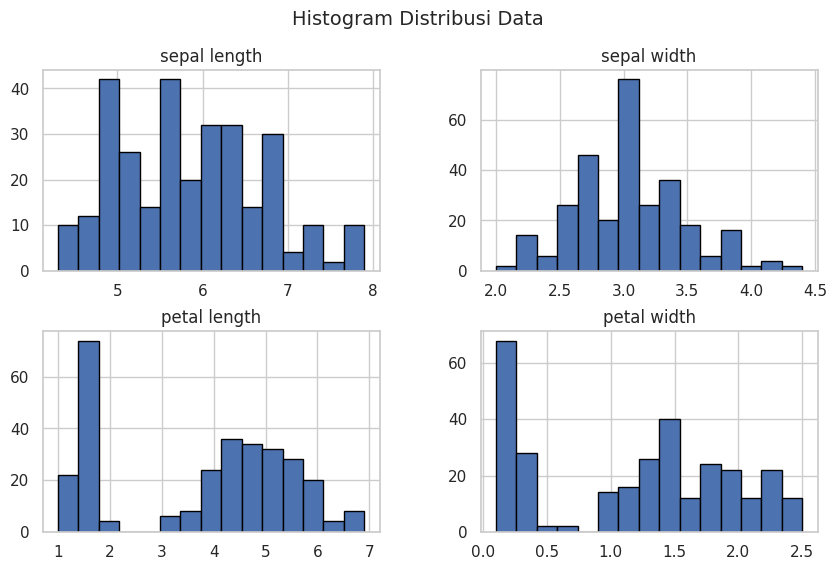

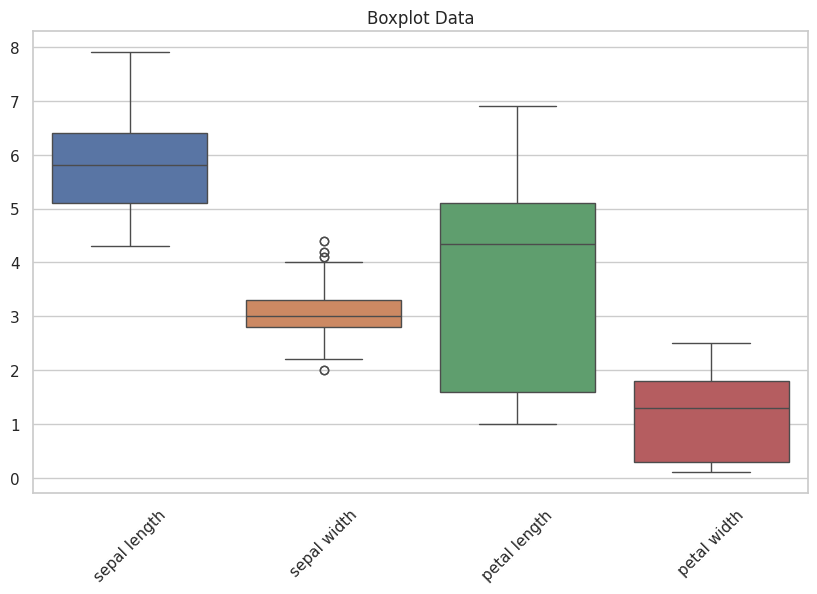

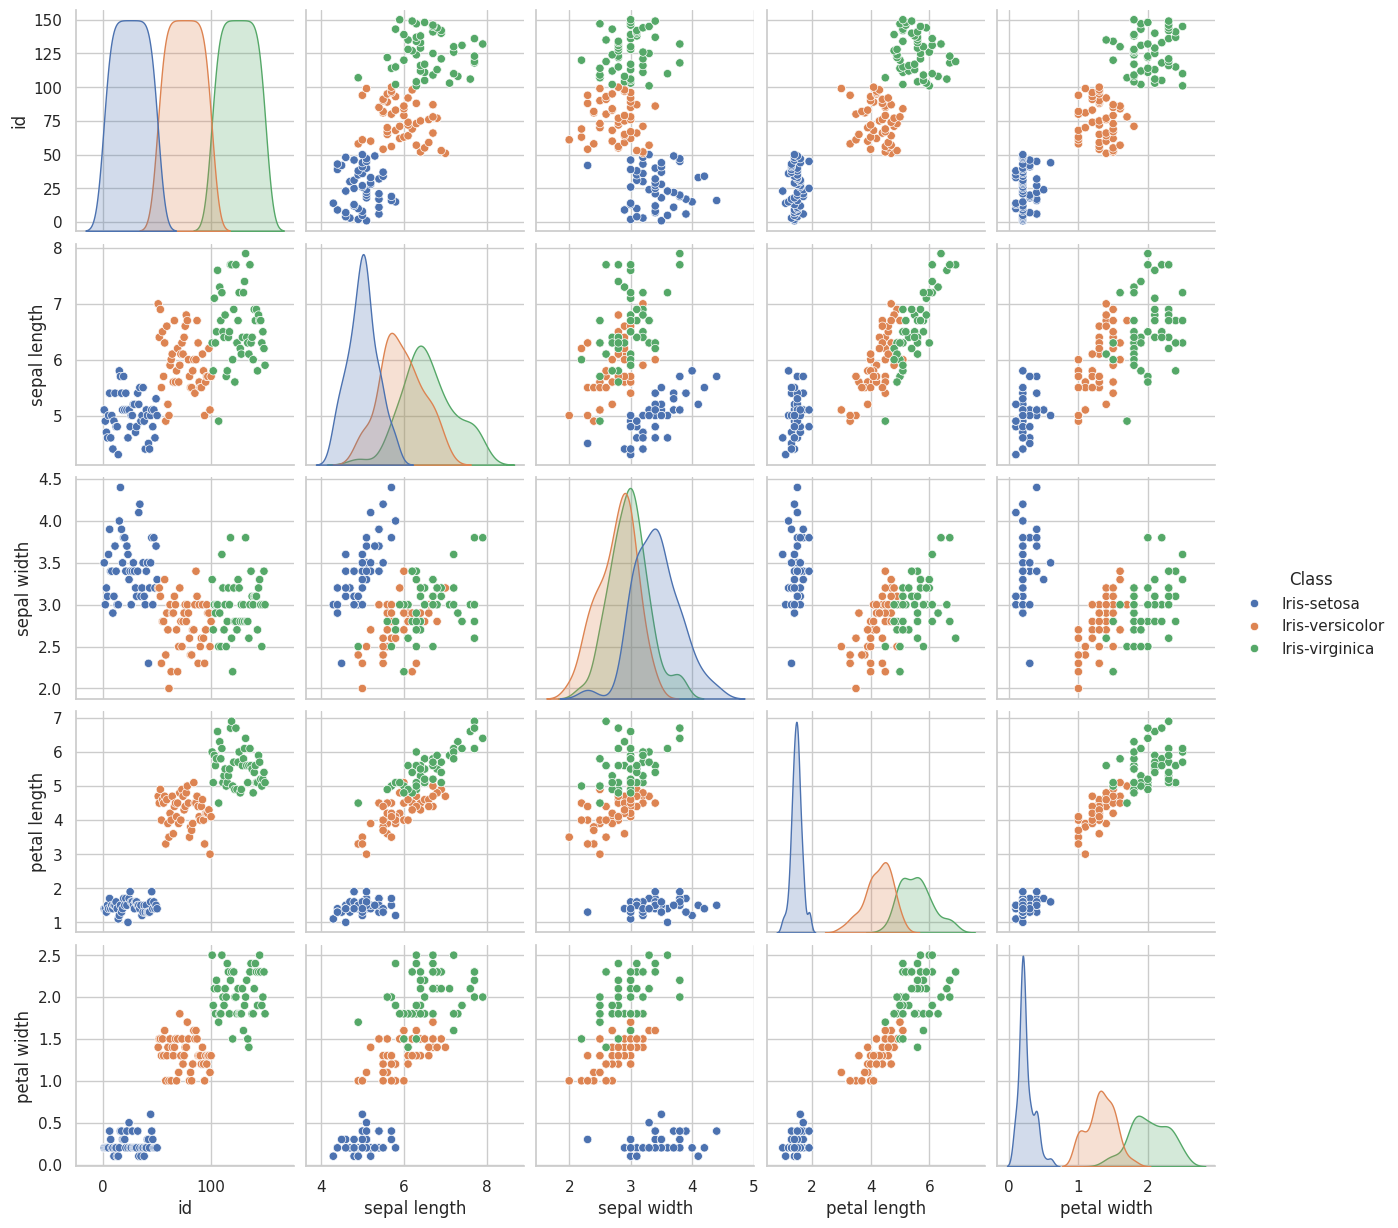

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

selected_columns.hist(figsize=(10, 6), bins=15, edgecolor='black')
plt.suptitle("Histogram Distribusi Data", fontsize=14)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=selected_columns)
plt.title("Boxplot Data")
plt.xticks(rotation=45)
plt.show()

sns.pairplot(combined_df, hue="Class", diag_kind="kde")
plt.show()


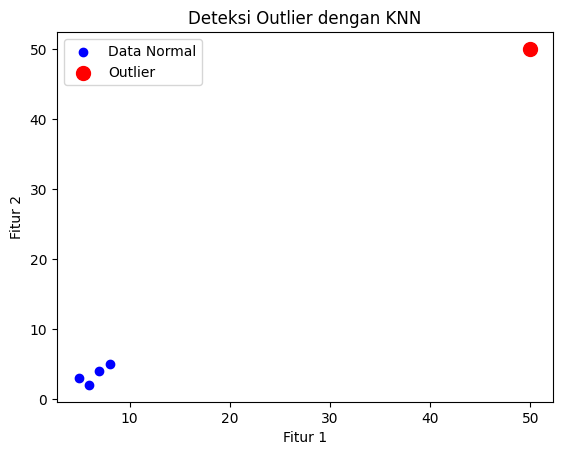

Skor Outlier untuk masing-masing titik: [ 1.41421356  1.41421356  1.41421356  1.41421356 61.55485359]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Contoh dataset dengan outlier
data = np.array([[5, 3], [6, 2], [7, 4], [8, 5], [50, 50]])  # Titik (50,50) adalah outlier

# Model KNN untuk mencari tetangga terdekat
K = 2
nbrs = NearestNeighbors(n_neighbors=K)
nbrs.fit(data)

# Hitung jarak ke K tetangga terdekat
distances, indices = nbrs.kneighbors(data)

# Ambil jarak maksimum ke tetangga terdekat
outlier_scores = distances[:, -1]

# Plot data
plt.scatter(data[:, 0], data[:, 1], c='blue', label="Data Normal")
plt.scatter(data[np.argmax(outlier_scores), 0], data[np.argmax(outlier_scores), 1], c='red', label="Outlier", s=100)
plt.legend()
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.title("Deteksi Outlier dengan KNN")
plt.show()

# Menampilkan skor outlier
print("Skor Outlier untuk masing-masing titik:", outlier_scores)


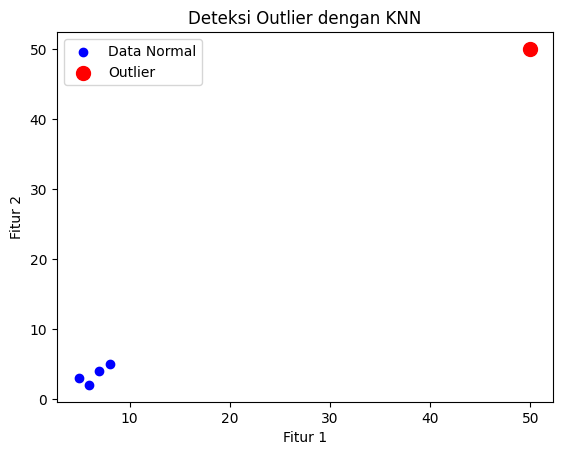

Skor Outlier untuk masing-masing titik: [ 1.41421356  1.41421356  1.41421356  1.41421356 61.55485359]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Contoh dataset dengan outlier
data = np.array([[5, 3], [6, 2], [7, 4], [8, 5], [50, 50]])  # (50,50) adalah outlier

# Model KNN untuk mencari tetangga terdekat
K = 2
nbrs = NearestNeighbors(n_neighbors=K)
nbrs.fit(data)

# Hitung jarak ke K tetangga terdekat
distances, indices = nbrs.kneighbors(data)

# Ambil jarak maksimum ke tetangga terdekat
outlier_scores = distances[:, -1]

# Plot data
plt.scatter(data[:, 0], data[:, 1], c='blue', label="Data Normal")
plt.scatter(data[np.argmax(outlier_scores), 0], data[np.argmax(outlier_scores), 1], c='red', label="Outlier", s=100)
plt.legend()
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.title("Deteksi Outlier dengan KNN")
plt.show()

# Menampilkan skor outlier
print("Skor Outlier untuk masing-masing titik:", outlier_scores)


Akurasi KNN: 1.0
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



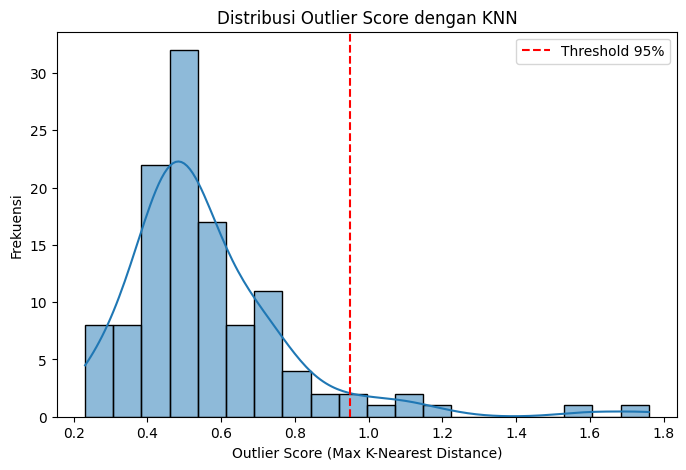

Jumlah outlier terdeteksi: 6
Index outlier: [  1  19  29  37  91 116]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.metrics import accuracy_score, classification_report

# Load dataset Iris
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset menjadi training & testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN untuk Klasifikasi
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_classifier.fit(X_train_scaled, y_train)

# Prediksi
y_pred = knn_classifier.predict(X_test_scaled)

# Evaluasi model
print("Akurasi KNN:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

# ------------------------------------
# KNN untuk Deteksi Outlier
# ------------------------------------

# Gunakan KNN untuk mencari outlier
K = 5
nbrs = NearestNeighbors(n_neighbors=K, metric='euclidean')
nbrs.fit(X_train_scaled)

# Hitung jarak ke K tetangga terdekat
distances, indices = nbrs.kneighbors(X_train_scaled)

# Skor outlier berdasarkan jarak maksimum ke tetangga terdekat
outlier_scores = distances[:, -1]

# Plot distribusi skor outlier
plt.figure(figsize=(8, 5))
sns.histplot(outlier_scores, bins=20, kde=True)
plt.axvline(np.percentile(outlier_scores, 95), color='red', linestyle='dashed', label="Threshold 95%")
plt.xlabel("Outlier Score (Max K-Nearest Distance)")
plt.ylabel("Frekuensi")
plt.title("Distribusi Outlier Score dengan KNN")
plt.legend()
plt.show()

# Menandai outlier (nilai di atas threshold persentil 95)
threshold = np.percentile(outlier_scores, 95)
outliers = np.where(outlier_scores > threshold)[0]

print(f"Jumlah outlier terdeteksi: {len(outliers)}")
print("Index outlier:", outliers)
